Student Name: Chi Nguyen


Machine Learning for Public Policy


HW3 - Applying a machine learning pipeline to the donors dataset


Pipeline codes are in the files preprocess.py and build_models.py

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pandas as pd
import numpy as np
import preprocess
import build_models
import mlhelperfunctions

# Load data and explore

In [8]:
donors = preprocess.import_csv("projects_2012_2013.csv")
donors.head()

,projectid,teacher_acctid,schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_metro,school_district,...,secondary_focus_subject,secondary_focus_area,resource_type,poverty_level,grade_level,total_price_including_optional_support,students_reached,eligible_double_your_impact_match,date_posted,datefullyfunded
0,00001ccc0e81598c4bd86bacb94d7acb,96963218e74e10c3764a5cfb153e6fea,9f3f9f2c2da7edda5648ccd10554ed8c,1.709930e+11,41.807654,-87.673257,Chicago,IL,urban,Pershing Elem Network,...,Visual Arts,Music & The Arts,Supplies,highest poverty,Grades PreK-2,1498.61,31.0,f,4/14/13,5/2/13
1,0000fa3aa8f6649abab23615b546016d,2a578595fe351e7fce057e048c409b18,3432ed3d4466fac2f2ead83ab354e333,6.409801e+10,34.296596,-119.296596,Ventura,CA,urban,Ventura Unif School District,...,Literature & Writing,Literacy & Language,Books,highest poverty,Grades 3-5,282.47,28.0,t,4/7/12,4/18/12
2,000134f07d4b30140d63262c871748ff,26bd60377bdbffb53a644a16c5308e82,dc8dcb501c3b2bb0b10e9c6ee2cd8afd,6.227100e+10,34.078625,-118.257834,Los Angeles,CA,urban,Los Angeles Unif Sch Dist,...,Social Sciences,History & Civics,Technology,high poverty,Grades 3-5,1012.38,56.0,f,1/30/12,4/15/12
3,0001f2d0b3827bba67cdbeaa248b832d,15d900805d9d716c051c671827109f45,8bea7e8c6e4279fca6276128db89292e,3.600090e+11,40.687286,-73.988217,Brooklyn,NY,urban,New York City Dept Of Ed,...,NaN,NaN,Books,high poverty,Grades PreK-2,175.33,23.0,f,10/11/12,12/5/12
4,0004536db996ba697ca72c9e058bfe69,400f8b82bb0143f6a40b217a517fe311,fbdefab6fe41e12c55886c610c110753,3.606870e+11,40.793018,-73.205635,Central Islip,NY,suburban,Central Islip Union Free SD,...,Literature & Writing,Literacy & Language,Technology,high poverty,Grades PreK-2,3591.11,150.0,f,1/8/13,3/25/13


In [9]:
preprocess.explore_data(donors)

Let's take a look at the first 10 lines of the dataframe!

                          projectid                    teacher_acctid  \
0  00001ccc0e81598c4bd86bacb94d7acb  96963218e74e10c3764a5cfb153e6fea   
1  0000fa3aa8f6649abab23615b546016d  2a578595fe351e7fce057e048c409b18   
2  000134f07d4b30140d63262c871748ff  26bd60377bdbffb53a644a16c5308e82   
3  0001f2d0b3827bba67cdbeaa248b832d  15d900805d9d716c051c671827109f45   
4  0004536db996ba697ca72c9e058bfe69  400f8b82bb0143f6a40b217a517fe311   
5  00049ec8ca1f2d08cb13cab31b0b85ec  7149611553c700de9a6099f8a9ce598b   
6  0004d2fdbb571237fa53a97e7691440b  926671e209fb977bd5123145c1848ad1   
7  0004ee26667e751dd51384eb9f30c72e  abe4dabb7864f4c548d230cf9070e03f   
8  0006a31d45f8d52d217e7c5b55c11f37  3b5fada1ad0e339acc669829071320c4   
9  0008ac907bf237a15a959244205d3ee5  92527a5ac5fe946ed1961fb2e1de8cc5   

                           schoolid  school_ncesid  school_latitude  \
0  9f3f9f2c2da7edda5648ccd10554ed8c   1.709930e+11        41.80765

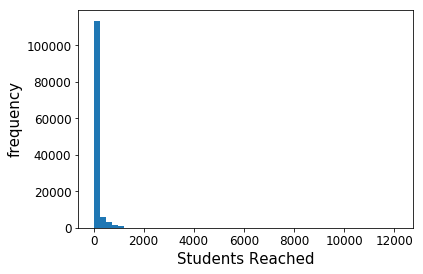

In [20]:
preprocess.create_hist(donors, 'students_reached', 'Students Reached', 
                       'frequency', "Histogram of number of students reached")

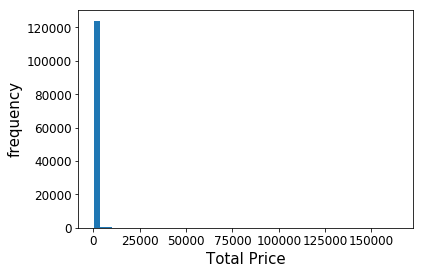

In [21]:
preprocess.create_hist(donors, 'total_price_including_optional_support', 'Total Price', 
                       'frequency', "Histogram of total price")

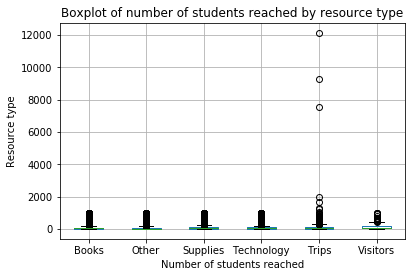

In [22]:
preprocess.create_boxplot(donors, 'students_reached', 'resource_type', 
                          'Number of students reached', 'Resource type',
                          'Boxplot of number of students reached by resource type')

In [23]:
donors['students_reached'].corr(donors['total_price_including_optional_support'])

0.1766274350291622

# Create Label

In [35]:
donors['time_to_fund'] = donors['datefullyfunded'] - donors['date_posted']
donors['fund_within_60'] = np.where(donors['time_to_fund'] > pd.to_timedelta(60, unit='D'), 1, 0)

# Process Data & Create Features

In [13]:
cols_to_transform_to_datetime = ['date_posted', 'datefullyfunded']
build_models.convert_to_datetime(donors, cols_to_transform_to_datetime)
donors.dtypes

projectid                                         object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                    float64
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
teacher_prefix                                    object
primary_focus_subject                             object
primary_focus_area                                object
secondary_focus_subject                           object
secondary_focus_area           

Splitting data into training and testing sets. Only for data in the training set, process the data through the following steps:


* For the numeric columns, fill in missing data with the median value


* For columns that will be turned into features, discretize and convert to binary 

In [36]:
date_col = 'date_posted'
prediction_windows = [6]
gap = 60
start_time = '2012-01-01'
end_time = '2013-12-31'
rv = build_models.temporal_validation(donors, date_col,
                                      prediction_windows, gap,
                                      start_time, end_time)

In [37]:
cols_to_discretize = ['students_reached', 'total_price_including_optional_support']
num_bins = 3
labels = ['low', 'medium', 'high']
cols_to_binary = ['school_state', 'school_metro',
                  'school_charter', 'school_magnet',
                  'primary_focus_subject', 'resource_type',
                  'poverty_level', 'grade_level', 'students_reached_group', 
                  'total_price_including_optional_support_group']
processed_rv = build_models.process_train_data(rv, cols_to_discretize, num_bins, labels, cols_to_binary)

secondary_focus_area                      24334
secondary_focus_subject                   24334
school_metro                               8573
school_ncesid                              5312
school_district                             116
students_reached                             57
resource_type                                17
primary_focus_area                           15
primary_focus_subject                        15
grade_level                                   3
school_state                                  0
school_city                                   0
fund_within_60                                0
school_latitude                               0
schoolid                                      0
teacher_acctid                                0
school_longitude                              0
teacher_prefix                                0
school_county                                 0
school_charter                                0
school_magnet                           

/Users/chinguyen/ML/HW3/build_models.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  include_lowest=True)


secondary_focus_area                      14220
secondary_focus_subject                   14220
school_metro                               5814
school_ncesid                              3477
school_district                              54
fund_within_60                                0
school_magnet                                 0
teacher_acctid                                0
schoolid                                      0
school_latitude                               0
school_longitude                              0
school_city                                   0
school_state                                  0
school_county                                 0
school_charter                                0
teacher_prefix                                0
time_to_fund                                  0
primary_focus_subject                         0
primary_focus_area                            0
resource_type                                 0
poverty_level                           

Can't fill missing values for non-numeric column school_metro
Can't fill missing values for non-numeric column school_district
Can't fill missing values for non-numeric column secondary_focus_subject
Can't fill missing values for non-numeric column secondary_focus_area


In [31]:
l = [elem[0] for elem in processed_rv.values()]
one_train_set = l[0]
col_list = one_train_set.columns.tolist()
selected_features = col_list[70:134]
selected_features

['school_metro_rural',
 'school_metro_suburban',
 'school_metro_urban',
 'school_metro_nan',
 'school_charter_f',
 'school_charter_t',
 'school_charter_nan',
 'school_magnet_f',
 'school_magnet_t',
 'school_magnet_nan',
 'primary_focus_subject_Applied Sciences',
 'primary_focus_subject_Character Education',
 'primary_focus_subject_Civics & Government',
 'primary_focus_subject_College & Career Prep',
 'primary_focus_subject_Community Service',
 'primary_focus_subject_ESL',
 'primary_focus_subject_Early Development',
 'primary_focus_subject_Economics',
 'primary_focus_subject_Environmental Science',
 'primary_focus_subject_Extracurricular',
 'primary_focus_subject_Foreign Languages',
 'primary_focus_subject_Gym & Fitness',
 'primary_focus_subject_Health & Life Science',
 'primary_focus_subject_Health & Wellness',
 'primary_focus_subject_History & Geography',
 'primary_focus_subject_Literacy',
 'primary_focus_subject_Literature & Writing',
 'primary_focus_subject_Mathematics',
 'primary_f

# Build models and create a dataframe to store evaluation metrics

In [38]:
#grid_size = 'mini'
grid_size = 'test'
clfs, grid = mlhelperfunctions.define_clfs_params(grid_size)
#models_to_run = ['RF', 'B', 'LR', 'DT', 'GB', 'SVM', 'KNN']
models_to_run = ['DT']
predictors = selected_features
outcome = 'fund_within_60'

DT
Added row 1


<Figure size 432x288 with 0 Axes>

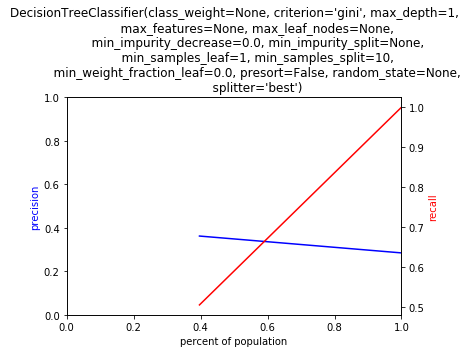

DT
Added row 2


<Figure size 432x288 with 0 Axes>

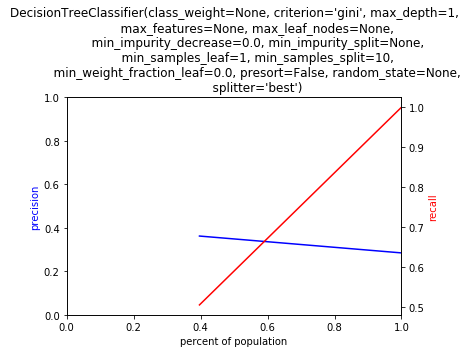

DT
Added row 3


<Figure size 432x288 with 0 Axes>

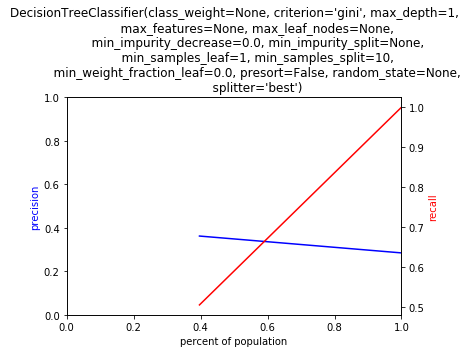

,model_type,clf,parameters,split_date,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,...,recall_at_30,recall_at_50,f1_at_5,f1_at_20,f1_at_50,auc-roc,target_threshold_top_5_percent,precision_at_target,recall_at_target,f1_at_target
0,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2013-06-30,0.284679,0.002268,0.001133,0.000453,0.000226,0.008263,...,0.348441,0.867605,0.000135,0.006819,0.629529,0.575471,0.344264,0.006579,0.00008,0.000157
1,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2012-12-30,0.284679,0.002268,0.001133,0.000453,0.000226,0.008263,...,0.348441,0.867605,0.000135,0.006819,0.629529,0.575471,0.344264,0.006579,0.00008,0.000157
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2012-06-30,0.284679,0.002268,0.001133,0.000453,0.000226,0.008263,...,0.348441,0.867605,0.000135,0.006819,0.629529,0.575471,0.344264,0.006579,0.00008,0.000157


In [40]:
results_df = build_models.clf_loop_cross_validation(models_to_run, clfs, grid, processed_rv, 
                                                    predictors, outcome, test_size=0.2)
results_df

In [56]:
results_df.to_csv('ml_results.csv')

# Evaluating models
Detailed analysis - please see the write-up

In [58]:
summary = pd.pivot_table(results_df,
                         index=['model_type', 'split_date'],
                         aggfunc='mean',
                         fill_value=0)
f1_list = ['f1_at_5', 'f1_at_20', 'f1_at_50']
p_list = ['p_at_1', 'p_at_2', 'p_at_5', 
          'p_at_10', 'p_at_20', 'p_at_30', 'p_at_50']
recall_list = ['recall_at_1', 'recall_at_2', 'recall_at_5', 
               'recall_at_10', 'recall_at_20', 'recall_at_30', 'recall_at_50']

In [59]:
summary

auc-roc  baseline  f1_at_20   f1_at_5  f1_at_50  \
model_type split_date                                                     
B          2012-06-30  0.577026  0.256968  0.281326  0.075667  0.403184   
           2012-12-30  0.582248  0.314735  0.302808  0.075964  0.458896   
           2013-06-30  0.600138  0.284679  0.304765  0.078508  0.454323   
DT         2012-06-30  0.596734  0.256968  0.216780  0.071364  0.485080   
           2012-12-30  0.608715  0.314735  0.237574  0.073192  0.543361   
           2013-06-30  0.615972  0.284679  0.230988  0.060281  0.524554   
GB         2012-06-30  0.617392  0.256968  0.220200  0.073218  0.476218   
           2012-12-30  0.628449  0.314735  0.245837  0.079396  0.529788   
           2013-06-30  0.636811  0.284679  0.243199  0.067159  0.516090   
KNN        2012-06-30  0.573257  0.256968  0.276353  0.106860  0.402782   
           2012-12-30  0.585313  0.314735  0.275356  0.111420  0.583272   
           2013-06-30  0.596646  0.284679  0.272103  0.101461  0.483556   
LR         2012-06-30  0.650081  0.256968  0.307601  0.126338  0.470033   
           2012-12-30  0.655249  0.314735  0.360442  0.126390  0.525519   
           2013-06-30  0.667806  0.284679  0.360924  0.127418  0.498247   
RF         2012-06-30  0.613962  0.256968  0.286708  0.095956  0.507547   
           2012-12-30  0.607802  0.314735  0.285538  0.086439  0.534864   
           2013-06-30  0.629681  0.284679  0.242737  0.086868  0.526916   
SVM        2012-06-30  0.656975  0.256968  0.351282  0.142268  0.457113   
           2012-12-30  0.659071  0.314735  0.367953  0.143254  0.512673   
           2013-06-30  0.670553  0.284679  0.366839  0.145373  0.493757   

                       f1_at_target    p_at_1   p_at_10    p_at_2   p_at_20  \
model_type split_date                                                         
B          2012-06-30      0.013016  0.231707  0.269122  0.238458  0.321414   
           2012-12-30      0.012503  0.285714  0.400461  0.298771  0.389708   
           2013-06-30      0.013076  0.258503  0.354917  0.259721  0.369289   
DT         2012-06-30      0.003769  0.117039  0.219995  0.159289  0.247671   
           2012-12-30      0.003995  0.157578  0.265745  0.205165  0.305754   
           2013-06-30      0.003794  0.127646  0.235671  0.161555  0.279892   
GB         2012-06-30      0.005597  0.158346  0.256048  0.165811  0.251579   
           2012-12-30      0.005830  0.199021  0.314286  0.230559  0.316388   
           2013-06-30      0.005732  0.162698  0.281271  0.191959  0.294687   
KNN        2012-06-30      0.022281  0.295732  0.222155  0.147641  0.315733   
           2012-12-30      0.013791  0.299539  0.203226  0.149770  0.354378   
           2013-06-30      0.023668  0.349206  0.251755  0.174405  0.329711   
LR         2012-06-30      0.015014  0.388338  0.369294  0.400495  0.351434   
           2012-12-30      0.014029  0.470622  0.439343  0.501152  0.463882   
           2013-06-30      0.016729  0.467120  0.455428  0.432191  0.437337   
RF         2012-06-30      0.009344  0.273247  0.304588  0.287481  0.327564   
           2012-12-30      0.008094  0.312788  0.366244  0.307604  0.367483   
           2013-06-30      0.005929  0.255952  0.293185  0.270527  0.294128   
SVM        2012-06-30      0.000000  0.451829  0.422763  0.456012  0.401339   
           2012-12-30      0.000000  0.540092  0.494747  0.572811  0.473548   
           2013-06-30      0.000000  0.526984  0.472085  0.500340  0.444505   

                       ...  precision_at_target  recall_at_1  recall_at_10  \
model_type split_date  ...                                                   
B          2012-06-30  ...             0.216352     0.008999      0.104717   
           2012-12-30  ...             0.283822     0.009076      0.127214   
           2013-06-30  ...             0.261659     0.009065      0.124655   
DT         2012-06-30  ...             0.105417     0.004546      0.085601   
           2

In [64]:
summary[f1_list].sort_values(by='f1_at_50')

f1_at_5  f1_at_20  f1_at_50
model_type split_date                              
KNN        2012-06-30  0.106860  0.276353  0.402782
B          2012-06-30  0.075667  0.281326  0.403184
           2013-06-30  0.078508  0.304765  0.454323
SVM        2012-06-30  0.142268  0.351282  0.457113
B          2012-12-30  0.075964  0.302808  0.458896
LR         2012-06-30  0.126338  0.307601  0.470033
GB         2012-06-30  0.073218  0.220200  0.476218
KNN        2013-06-30  0.101461  0.272103  0.483556
DT         2012-06-30  0.071364  0.216780  0.485080
SVM        2013-06-30  0.145373  0.366839  0.493757
LR         2013-06-30  0.127418  0.360924  0.498247
RF         2012-06-30  0.095956  0.286708  0.507547
SVM        2012-12-30  0.143254  0.367953  0.512673
GB         2013-06-30  0.067159  0.243199  0.516090
DT         2013-06-30  0.060281  0.230988  0.524554
LR         2012-12-30  0.126390  0.360442  0.525519
RF         2013-06-30  0.086868  0.242737  0.526916
GB         2012-12-30  0.079396  0.245837  0.529788
RF         2012-12-30  0.086439  0.285538  0.534864
DT         2012-12-30  0.073192  0.237574  0.543361
KNN        2012-12-30  0.111420  0.275356  0.583272

In [68]:
summary[p_list]

p_at_1    p_at_2    p_at_5   p_at_10   p_at_20  \
model_type split_date                                                     
B          2012-06-30  0.231707  0.238458  0.232299  0.269122  0.321414   
           2012-12-30  0.285714  0.298771  0.277112  0.400461  0.389708   
           2013-06-30  0.258503  0.259721  0.262832  0.354917  0.369289   
DT         2012-06-30  0.117039  0.159289  0.219086  0.219995  0.247671   
           2012-12-30  0.157578  0.205165  0.266999  0.265745  0.305754   
           2013-06-30  0.127646  0.161555  0.201810  0.235671  0.279892   
GB         2012-06-30  0.158346  0.165811  0.224779  0.256048  0.251579   
           2012-12-30  0.199021  0.230559  0.289631  0.314286  0.316388   
           2013-06-30  0.162698  0.191959  0.224836  0.281271  0.294687   
KNN        2012-06-30  0.295732  0.147641  0.328058  0.222155  0.315733   
           2012-12-30  0.299539  0.149770  0.406452  0.203226  0.354378   
           2013-06-30  0.349206  0.174405  0.339674  0.251755  0.329711   
LR         2012-06-30  0.388338  0.400495  0.387858  0.369294  0.351434   
           2012-12-30  0.470622  0.501152  0.461060  0.439343  0.463882   
           2013-06-30  0.467120  0.432191  0.426574  0.455428  0.437337   
RF         2012-06-30  0.273247  0.287481  0.294583  0.304588  0.327564   
           2012-12-30  0.312788  0.307604  0.315323  0.366244  0.367483   
           2013-06-30  0.255952  0.270527  0.290817  0.293185  0.294128   
SVM        2012-06-30  0.451829  0.456012  0.436762  0.422763  0.401339   
           2012-12-30  0.540092  0.572811  0.522581  0.494747  0.473548   
           2013-06-30  0.526984  0.500340  0.486685  0.472085  0.444505   

                        p_at_30   p_at_50  
model_type split_date                      
B          2012-06-30  0.321432  0.305197  
           2012-12-30  0.398300  0.373879  
           2013-06-30  0.373327  0.356498  
DT         2012-06-30  0.301210  0.367190  
           2012-12-30  0.369119  0.442695  
           2013-06-30  0.336407  0.411607  
GB         2012-06-30  0.297362  0.360482  
           2012-12-30  0.359680  0.431637  
           2013-06-30  0.335383  0.404965  
KNN        2012-06-30  0.235115  0.304893  
           2012-12-30  0.237291  0.475212  
           2013-06-30  0.277618  0.379437  
LR         2012-06-30  0.352647  0.355800  
           2012-12-30  0.445093  0.428158  
           2013-06-30  0.419720  0.390965  
RF         2012-06-30  0.340349  0.384197  
           2012-12-30  0.400150  0.435772  
           2013-06-30  0.357720  0.413460  
SVM        2012-06-30  0.381256  0.346020  
           2012-12-30  0.451943  0.417693  
           2013-06-30  0.424389  0.387441

In [67]:
summary[p_list].sort_values(by='p_at_50', ascending=False)

,,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,p_at_30,p_at_50
model_type,split_date,,,,,,,
KNN,2012-12-30,0.299539,0.149770,0.406452,0.203226,0.354378,0.237291,0.475212
DT,2012-12-30,0.157578,0.205165,0.266999,0.265745,0.305754,0.369119,0.442695
RF,2012-12-30,0.312788,0.307604,0.315323,0.366244,0.367483,0.400150,0.435772
GB,2012-12-30,0.199021,0.230559,0.289631,0.314286,0.316388,0.359680,0.431637
LR,2012-12-30,0.470622,0.501152,0.461060,0.439343,0.463882,0.445093,0.428158
SVM,2012-12-30,0.540092,0.572811,0.522581,0.494747,0.473548,0.451943,0.417693
RF,2013-06-30,0.255952,0.270527,0.290817,0.293185,0.294128,0.357720,0.413460
DT,2013-06-30,0.127646,0.161555,0.201810,0.235671,0.279892,0.336407,0.411607
GB,2013-06-30,0.162698,0.191959,0.224836,0.281271,0.294687,0.335383,0.404965


In [62]:
summary[recall_list]

recall_at_1  recall_at_2  recall_at_5  recall_at_10  \
model_type split_date                                                        
B          2012-06-30     0.008999     0.018551     0.045194      0.104717   
           2012-12-30     0.009076     0.018982     0.044015      0.127214   
           2013-06-30     0.009065     0.018236     0.046146      0.124655   
DT         2012-06-30     0.004546     0.012392     0.042624      0.085601   
           2012-12-30     0.005006     0.013035     0.042409      0.084419   
           2013-06-30     0.004476     0.011343     0.035432      0.082773   
GB         2012-06-30     0.006150     0.012900     0.043731      0.099630   
           2012-12-30     0.006322     0.014648     0.046004      0.099839   
           2013-06-30     0.005705     0.013478     0.039475      0.098789   
KNN        2012-06-30     0.011486     0.011486     0.063825      0.086442   
           2012-12-30     0.009515     0.009515     0.064559      0.064559   
           2013-06-30     0.012246     0.012246     0.059637      0.088422   
LR         2012-06-30     0.015083     0.031157     0.075459      0.143694   
           2012-12-30     0.014950     0.031840     0.073232      0.139566   
           2013-06-30     0.016380     0.030345     0.074895      0.159957   
RF         2012-06-30     0.010613     0.022365     0.057312      0.118517   
           2012-12-30     0.009936     0.019543     0.050084      0.116345   
           2013-06-30     0.008975     0.018995     0.051060      0.102974   
SVM        2012-06-30     0.017549     0.035477     0.084973      0.164500   
           2012-12-30     0.017157     0.036393     0.083004      0.157166   
           2013-06-30     0.018480     0.035130     0.085448      0.165808   

                       recall_at_20  recall_at_30  recall_at_50  
model_type split_date                                            
B          2012-06-30      0.250128      0.375252      0.593843  
           2012-12-30      0.247597      0.379642      0.593959  
           2013-06-30      0.259436      0.393395      0.626140  
DT         2012-06-30      0.192741      0.351643      0.714466  
           2012-12-30      0.194257      0.351827      0.703283  
           2013-06-30      0.196632      0.354490      0.722930  
GB         2012-06-30      0.195782      0.347151      0.701414  
           2012-12-30      0.201014      0.342830      0.685716  
           2013-06-30      0.207026      0.353411      0.711266  
KNN        2012-06-30      0.245708      0.274482      0.593250  
           2012-12-30      0.225150      0.226175      0.754941  
           2013-06-30      0.231632      0.292541      0.666428  
LR         2012-06-30      0.273490      0.411693      0.692303  
           2012-12-30      0.294723      0.424242      0.680190  
           2013-06-30      0.307242      0.442281      0.686675  
RF         2012-06-30      0.254914      0.397336      0.747558  
           2012-12-30      0.233476      0.381405      0.692285  
           2013-06-30      0.206634      0.376948      0.726185  
SVM        2012-06-30      0.312327      0.445092      0.673274  
           2012-12-30      0.300864      0.430771      0.663563  
           2013-06-30      0.312277      0.447201      0.680487

In [69]:
summary[recall_list].sort_values(by='recall_at_50', ascending=False)

recall_at_1  recall_at_2  recall_at_5  recall_at_10  \
model_type split_date                                                        
KNN        2012-12-30     0.009515     0.009515     0.064559      0.064559   
RF         2012-06-30     0.010613     0.022365     0.057312      0.118517   
           2013-06-30     0.008975     0.018995     0.051060      0.102974   
DT         2013-06-30     0.004476     0.011343     0.035432      0.082773   
           2012-06-30     0.004546     0.012392     0.042624      0.085601   
GB         2013-06-30     0.005705     0.013478     0.039475      0.098789   
DT         2012-12-30     0.005006     0.013035     0.042409      0.084419   
GB         2012-06-30     0.006150     0.012900     0.043731      0.099630   
LR         2012-06-30     0.015083     0.031157     0.075459      0.143694   
RF         2012-12-30     0.009936     0.019543     0.050084      0.116345   
LR         2013-06-30     0.016380     0.030345     0.074895      0.159957   
GB         2012-12-30     0.006322     0.014648     0.046004      0.099839   
SVM        2013-06-30     0.018480     0.035130     0.085448      0.165808   
LR         2012-12-30     0.014950     0.031840     0.073232      0.139566   
SVM        2012-06-30     0.017549     0.035477     0.084973      0.164500   
KNN        2013-06-30     0.012246     0.012246     0.059637      0.088422   
SVM        2012-12-30     0.017157     0.036393     0.083004      0.157166   
B          2013-06-30     0.009065     0.018236     0.046146      0.124655   
           2012-12-30     0.009076     0.018982     0.044015      0.127214   
           2012-06-30     0.008999     0.018551     0.045194      0.104717   
KNN        2012-06-30     0.011486     0.011486     0.063825      0.086442   

                       recall_at_20  recall_at_30  recall_at_50  
model_type split_date                                            
KNN        2012-12-30      0.225150      0.226175      0.754941  
RF         2012-06-30      0.254914      0.397336      0.747558  
           2013-06-30      0.206634      0.376948      0.726185  
DT         2013-06-30      0.196632      0.354490      0.722930  
           2012-06-30      0.192741      0.351643      0.714466  
GB         2013-06-30      0.207026      0.353411      0.711266  
DT         2012-12-30      0.194257      0.351827      0.703283  
GB         2012-06-30      0.195782      0.347151      0.701414  
LR         2012-06-30      0.273490      0.411693      0.692303  
RF         2012-12-30      0.233476      0.381405      0.692285  
LR         2013-06-30      0.307242      0.442281      0.686675  
GB         2012-12-30      0.201014      0.342830      0.685716  
SVM        2013-06-30      0.312277      0.447201      0.680487  
LR         2012-12-30      0.294723      0.424242      0.680190  
SVM        2012-06-30      0.312327      0.445092      0.673274  
KNN        2013-06-30      0.231632      0.292541      0.666428  
SVM        2012-12-30      0.300864      0.430771      0.663563  
B          2013-06-30      0.259436      0.393395      0.626140  
           2012-12-30      0.247597      0.379642      0.593959  
           2012-06-30      0.250128      0.375252      0.593843  
KNN        2012-06-30      0.245708      0.274482      0.593250

In [73]:
highest_f1 = results_df[results_df['f1_at_50'] == results_df['f1_at_50'].max()]
highest_f1

,model_type,clf,parameters,split_date,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,...,recall_at_30,recall_at_50,f1_at_5,f1_at_20,f1_at_50,auc-roc,target_threshold_top_5_percent,precision_at_target,recall_at_target,f1_at_target
140,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2012-12-30,0.314735,0.004608,0.002304,0.000922,0.000461,0.225806,...,0.405943,1.0,0.000253,0.175454,0.772606,0.592459,0.391349,0.011905,0.000146,0.000289
171,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 1, 'max_...",2012-12-30,0.314735,0.188940,0.315668,0.245161,0.358065,0.363825,...,0.364807,1.0,0.067206,0.282696,0.772606,0.502901,0.279830,0.016667,0.000146,0.000290
174,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 1, 'max_...",2012-12-30,0.314735,0.354839,0.177419,0.149309,0.376959,0.344700,...,0.364807,1.0,0.040930,0.267836,0.772606,0.502039,0.280075,0.016667,0.000146,0.000290
175,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'entropy', 'max_depth': 1, 'max_...",2012-12-30,0.314735,0.004608,0.002304,0.000922,0.000461,0.225806,...,0.405943,1.0,0.000253,0.175454,0.772606,0.592459,0.391349,0.011905,0.000146,0.000289


In [74]:
highest_f1['parameters'].values

array([{'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 10},
       {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'sqrt', 'min_samples_split': 2},
       {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 2},
       {'criterion': 'entropy', 'max_depth': 1, 'max_features': 'log2', 'min_samples_split': 5}],
      dtype=object)

In [75]:
highest_auc = results_df[results_df['auc-roc'] == results_df['auc-roc'].max()]
highest_auc

,model_type,clf,parameters,split_date,baseline,p_at_1,p_at_2,p_at_5,p_at_10,p_at_20,...,recall_at_30,recall_at_50,f1_at_5,f1_at_20,f1_at_50,auc-roc,target_threshold_top_5_percent,precision_at_target,recall_at_target,f1_at_target
13,LR,"LogisticRegression(C=10, class_weight=None, du...","{'C': 0.1, 'penalty': 'l1'}",2013-06-30,0.284679,0.537415,0.500566,0.485507,0.475662,0.44584,...,0.44895,0.681377,0.145022,0.367942,0.494403,0.671322,0.490285,0.587963,0.010099,0.019856


In [76]:
highest_auc['parameters'].values

array([{'C': 0.1, 'penalty': 'l1'}], dtype=object)

In [63]:
top_5 = results_df[['model_type', 'parameters', 'split_date', 'target_threshold_top_5_percent', 'precision_at_target', 'recall_at_target', 'f1_at_target']]
top_5.sort_values(by = ['precision_at_target', 'f1_at_target'], ascending=False)

,model_type,parameters,split_date,target_threshold_top_5_percent,precision_at_target,recall_at_target,f1_at_target
181,DT,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",2012-12-30,0.392091,0.623529,0.007759,0.015327
14,LR,"{'C': 0.1, 'penalty': 'l2'}",2013-06-30,0.494008,0.596330,0.010337,0.020322
13,LR,"{'C': 0.1, 'penalty': 'l1'}",2013-06-30,0.490285,0.587963,0.010099,0.019856
15,LR,"{'C': 1, 'penalty': 'l1'}",2013-06-30,0.495695,0.582569,0.010099,0.019853
16,LR,"{'C': 1, 'penalty': 'l2'}",2013-06-30,0.496058,0.575342,0.010019,0.019695
17,LR,"{'C': 10, 'penalty': 'l1'}",2013-06-30,0.496275,0.575342,0.010019,0.019695
18,LR,"{'C': 10, 'penalty': 'l2'}",2013-06-30,0.496349,0.575342,0.010019,0.019695
127,LR,"{'C': 0.1, 'penalty': 'l2'}",2012-12-30,0.473420,0.558824,0.008344,0.016443
128,LR,"{'C': 1, 'penalty': 'l1'}",2012-12-30,0.474712,0.553398,0.008344,0.016441
129,LR,"{'C': 1, 'penalty': 'l2'}",2012-12-30,0.475052,0.553398,0.008344,0.016441
